In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
Header = ['Attribute_one', 'Attribute_two', 'Label']
file_one = pd.read_csv('/content/drive/MyDrive/mllab/5a1.csv', names = Header)
labels = file_one['Label']
file_one = file_one.drop(['Label'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(file_one, labels, test_size = 0.2)

In [4]:
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.T
x_test = x_test.T

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape((1,-1))
y_test = y_test.reshape((1,-1))

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2, 80)
(2, 20)
(1, 80)
(1, 20)


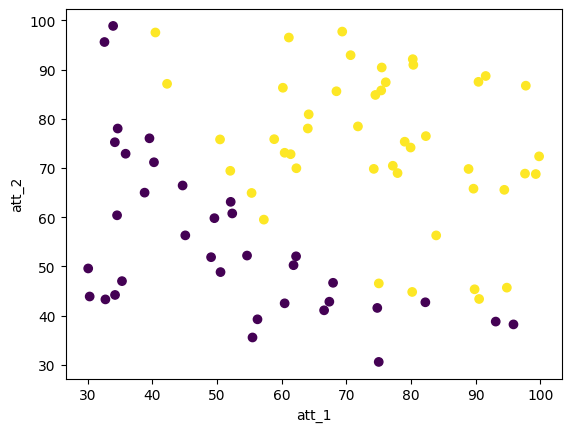

In [6]:
plt.scatter(x_train[0], x_train[1], cmap='viridis',c=y_train)
plt.xlabel('att_1')
plt.ylabel('att_2');

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [9]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = np.sum(-(Y * np.log(A) + (1-Y) * np.log(1-A)) / m)
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


In [11]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = np.where(A > 0.5, 1., 0.)
    return Y_prediction

In [16]:

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [17]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 1000000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100000: 0.384854
Cost after iteration 200000: 0.312245
Cost after iteration 300000: 0.279365
Cost after iteration 400000: 0.260630
Cost after iteration 500000: 0.248559
Cost after iteration 600000: 0.240168
Cost after iteration 700000: 0.234030
Cost after iteration 800000: 0.229371
Cost after iteration 900000: 0.225735
train accuracy: 88.75 %
test accuracy: 90.0 %
Train Confusion Matrix:
[[array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])], [array([0, 0

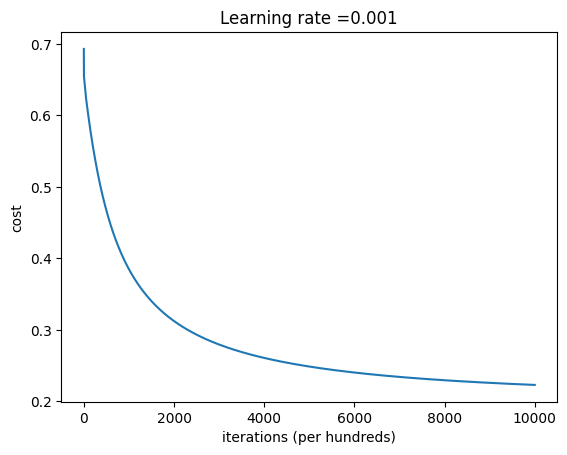

In [14]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()